In [ ]:
%matplotlib inline


# Feature importances with forests of trees


This examples shows the use of forests of trees to evaluate the importance of
features on an artificial classification task. The red bars are the feature
importances of the forest, along with their inter-trees variability.

As expected, the plot suggests that 3 features are informative, while the
remaining are not.


Automatically created module for IPython interactive environment
[[7.400000e-01 7.831000e-01 2.417200e+00 7.604810e+01 1.600000e-01
  1.000000e+00]
 [2.525300e+00 2.589800e+00 8.535700e+00 1.092141e+02 3.700000e-01
  1.000000e+00]
 [6.019100e+00 6.308300e+00 2.076450e+01 8.182480e+01 1.200000e+00
  1.000000e+00]
 ...
 [6.144880e+01 6.132620e+01 2.121077e+02 2.262573e+02 8.180000e+00
  1.000000e+00]
 [6.210920e+01 6.203170e+01 2.147748e+02 2.530315e+02 7.400000e+00
  2.000000e+00]
 [6.282360e+01 6.270290e+01 2.170222e+02 2.326163e+02 8.090000e+00
  2.000000e+00]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 3.
 1. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 2. 1. 1. 1. 1. 1. 3. 1. 1. 1.
 1. 1. 3. 1. 1. 1. 1. 1. 1. 3. 1. 3. 1. 3. 1. 1. 3. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 3. 1. 1. 1. 1. 3. 1. 1. 1. 3. 2. 1. 3. 1. 1. 1. 1.

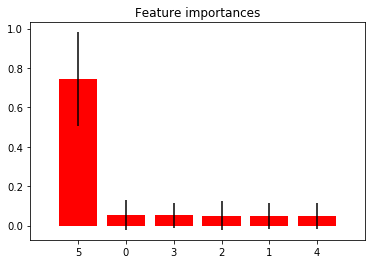

array([[ 9,  0,  0],
       [ 0, 10,  0],
       [ 0,  0,  8]], dtype=int64)

In [3]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import scale
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_roc_curve, confusion_matrix, accuracy_score

# header = ['name', 'hazType', 'meanXdist', 'meanYdist', 'meanAngle', 'meanSLdist', 'meanXspeed', 'meanYspeed', 'medianXdist', 
#           'medianYdist', 'medianAngle', 'medianSLdist', 'medianXspeed', 'medianYspeed', 'stdXdist', 'stdYdist', 'stdAngle', 
#           'stdSLdist', 'stdXspeed', 'stdYspeed', 'minXdist', 'minYdist', 'minAngle', 'minSLdist', 'minXspeed', 'minYspeed', 
#           'maxXdist', 'maxYdist', 'maxAngle', 'maxSLdist', 'maxXspeed', 'maxYspeed', 'rangeXdist',  'rangeYdist', 'rangeAngle', 
#           'rangeSLdist', 'rangeXspeed', 'rangeYspeed', 'skewXdist', 'skewYdist', 'skewAngle', 'skewSLdist', 'skewXspeed', 'skewYspeed', 
#           'kurtXdist', 'kurtYdist', 'kurtAngle', 'kurtSLdist', 'kurtXspeed', 'kurtYspeed', 'cvXdist', 'cvYdist', 
#           'cvAngle', 'cvSLdist', 'cvXspeed', 'cvYspeed', 'madXdist', 'madYdist', 'madAngle', 'madSLdist', 'madXspeed', 'madYspeed', 
#           'action', 'RT']


data = pd.read_csv("april11dataNoNaN-subdivided.csv", header =0, index_col=0)
npdata = data.to_numpy()
X = npdata[:, 1:8]
print(X)
y = npdata[:, 6]
print(y)

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import NearMiss 

print('Original dataset shape %s' % Counter(y))
nm = NearMiss()
X_res, y_res = nm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

X_train, X_test, y_train, y_test =  train_test_split(X_res,y_res, test_size=0.3, random_state=0)

# X_train_scaled = scale(X_train)
# X_test_scaled = scale(X_test)


# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250, random_state=0, max_depth = 5)

forest.fit(X_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()


y_true = y_test
y_pred = forest.predict(X_test)
confusion_matrix(y_true, y_pred)

# print(confusion_matrix(y_true, y_pred))
# print(accuracy_score(y_true, y_pred))

In [129]:
import numpy as np
data = pd.read_csv("april11dataNoNaN-subdivided.csv", header =0, index_col=0)
npdata = data.to_numpy()
X = npdata[:, 1:8]
# print(X)
y = npdata[:, 8]
# print(y)

X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size=0.3, random_state=0)

X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

In [136]:
import numpy as np
data = pd.read_csv("april11dataNoNaN-subdivided.csv", header =0, index_col=0)
npdata = data.to_numpy()
X = npdata[:, 1:8]
# print(X)
y = npdata[:, 8]
# print(y)

X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size=0.3, random_state=0)

X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt

reg = LinearRegression()
reg.fit(X_train_scaled, y_train)
y_pred=reg.predict(X_test_scaled)

# print(y_test)
# print(y_pred)

metrics.r2_score(y_test, y_pred)


# print('r2: %.2f' % metrics.r2_score(y_test, y_pred))
# print('mean sq error: %.2f' % metrics.mean_squared_error(y_test, y_pred))

# # print(clf.intercept_)
# # print(clf.coef_)

# df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
# print(df)

# df1 = df.head(25)
# df1.plot(kind='bar',figsize=(16,10))
# plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
# plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# plt.show()


0.09203071832895604

r2: 0.97
mean sq error: 0.15


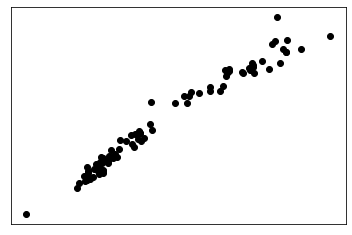

In [139]:
from sklearn.linear_model import Lasso
from sklearn import metrics
import matplotlib.pyplot as plt

clf = Lasso(alpha=1.0)
clf.fit(X_train, y_train)
Ridge()
y_pred=clf.predict(X_test)
print('r2: %.2f' % metrics.r2_score(y_test, y_pred))
print('mean sq error: %.2f' % metrics.mean_squared_error(y_test, y_pred))

# Plot outputs
plt.scatter(y_pred, y_test,  color='black')

plt.xticks(())
plt.yticks(())
plt.show()